# Task 1 : Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.decomposition import PCA
import tsfel
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
# Retina
%config InlineBackend.figure_format = 'retina'

In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = '/Users/shreya/Documents/fork-it/HAR/Combined/'
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


# Q1

In [5]:
laying_sample = pd.read_csv(os.path.join("Combined","Test","LAYING","Subject_9.csv"))
sitting_sample = pd.read_csv(os.path.join("Combined","Test","SITTING","Subject_9.csv"))
standing_sample = pd.read_csv(os.path.join("Combined","Test","STANDING","Subject_13.csv"))
walking_sample = pd.read_csv(os.path.join("Combined","Test","WALKING","Subject_24.csv"))
walking_downstairs_sample = pd.read_csv(os.path.join("Combined","Test","WALKING_DOWNSTAIRS","Subject_9.csv"))
walking_upstairs_sample = pd.read_csv(os.path.join("Combined","Test","WALKING_UPSTAIRS","Subject_10.csv"))

laying_sample['acc_norm'] = np.sqrt(laying_sample['accx']**2 + laying_sample['accy']**2 + laying_sample['accz']**2)
sitting_sample['acc_norm'] = np.sqrt(sitting_sample['accx']**2 + sitting_sample['accy']**2 + sitting_sample['accz']**2)
standing_sample['acc_norm'] = np.sqrt(standing_sample['accx']**2 + standing_sample['accy']**2 + standing_sample['accz']**2)
walking_sample['acc_norm'] = np.sqrt(walking_sample['accx']**2 + walking_sample['accy']**2 + walking_sample['accz']**2)
walking_downstairs_sample['acc_norm'] = np.sqrt(walking_downstairs_sample['accx']**2 + walking_downstairs_sample['accy']**2 + walking_downstairs_sample['accz']**2)
walking_upstairs_sample['acc_norm'] = np.sqrt(walking_upstairs_sample['accx']**2 + walking_upstairs_sample['accy']**2 + walking_upstairs_sample['accz']**2)

FileNotFoundError: [Errno 2] No such file or directory: 'Combined/Test/LAYING/Subject_9.csv'

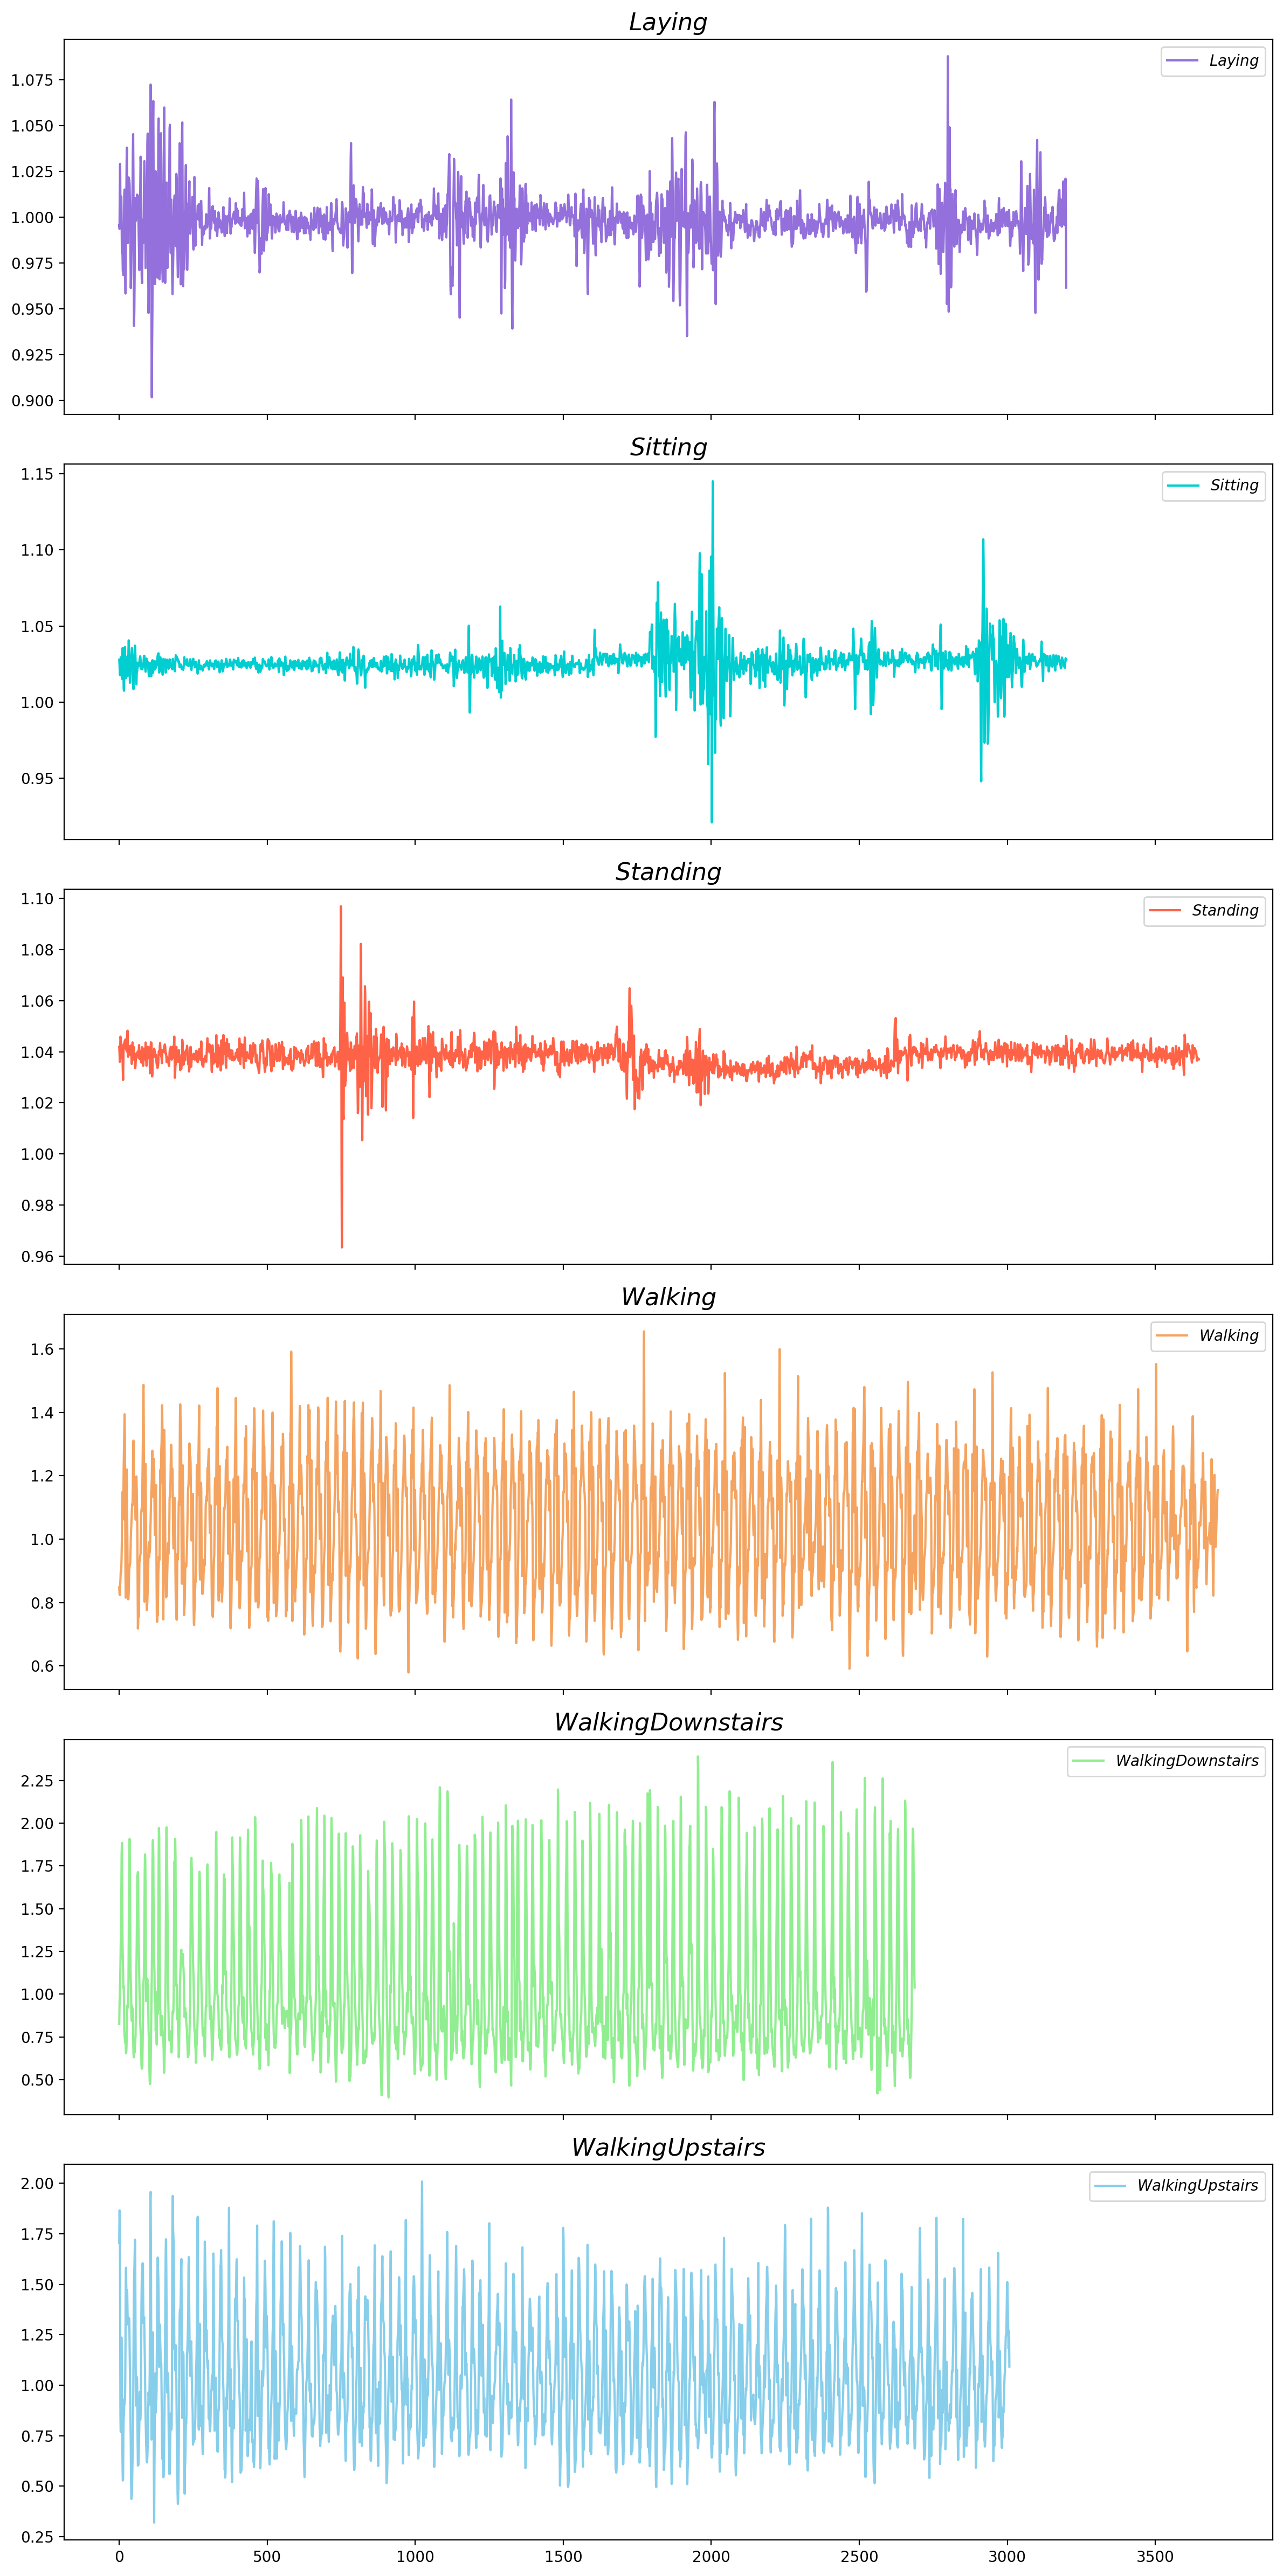

In [4]:
# Plot data with customizations
fig, ax = plt.subplots(6, 1, figsize=(12, 24), sharex=True)
ax[0].plot(laying_sample['acc_norm'], label='$Laying$', color='mediumpurple', antialiased = True)
ax[0].set_title("$Laying$", fontsize=16, weight='bold')
ax[0].legend(loc="upper right")
ax[1].plot(sitting_sample['acc_norm'], label='$Sitting$', color='darkturquoise', antialiased = True)
ax[1].set_title("$Sitting$", fontsize=16, weight='bold')
ax[1].legend(loc="upper right")
ax[2].plot(standing_sample['acc_norm'], label='$Standing$', color='tomato', antialiased = True)
ax[2].set_title("$Standing$", fontsize=16, weight='bold')
ax[2].legend(loc="upper right")
ax[3].plot(walking_sample['acc_norm'], label='$Walking$', color='sandybrown', antialiased = True)
ax[3].set_title("$Walking$", fontsize=16, weight='bold')
ax[3].legend(loc="upper right")
ax[4].plot(walking_downstairs_sample['acc_norm'], label='$Walking Downstairs$', color='lightgreen', antialiased = True)
ax[4].set_title("$Walking Downstairs$", fontsize=16, weight='bold')
ax[4].legend(loc="upper right")
ax[5].plot(walking_upstairs_sample['acc_norm'], label='$Walking Upstairs$', color='skyblue', antialiased = True)
ax[5].set_title("$Walking Upstairs$", fontsize=16, weight='bold')
ax[5].legend(loc="upper right")
# Apply tight layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

It can be infered from the graphs that the amplitudes of acceleration of static activities (Laying, Standing, Sitting) is much smaller than that of the dynamic activities (Walking, Walking Upstairs, Walking Downstairs).

The model can well differentiate / classify activities as static and dynamic only. But because of less complexity of the model, it can't differentiate the 6 activities much accurately. Since the data is time-sensored data, use of Neural Network Algorithms will be able to classify each activity.

# Q2

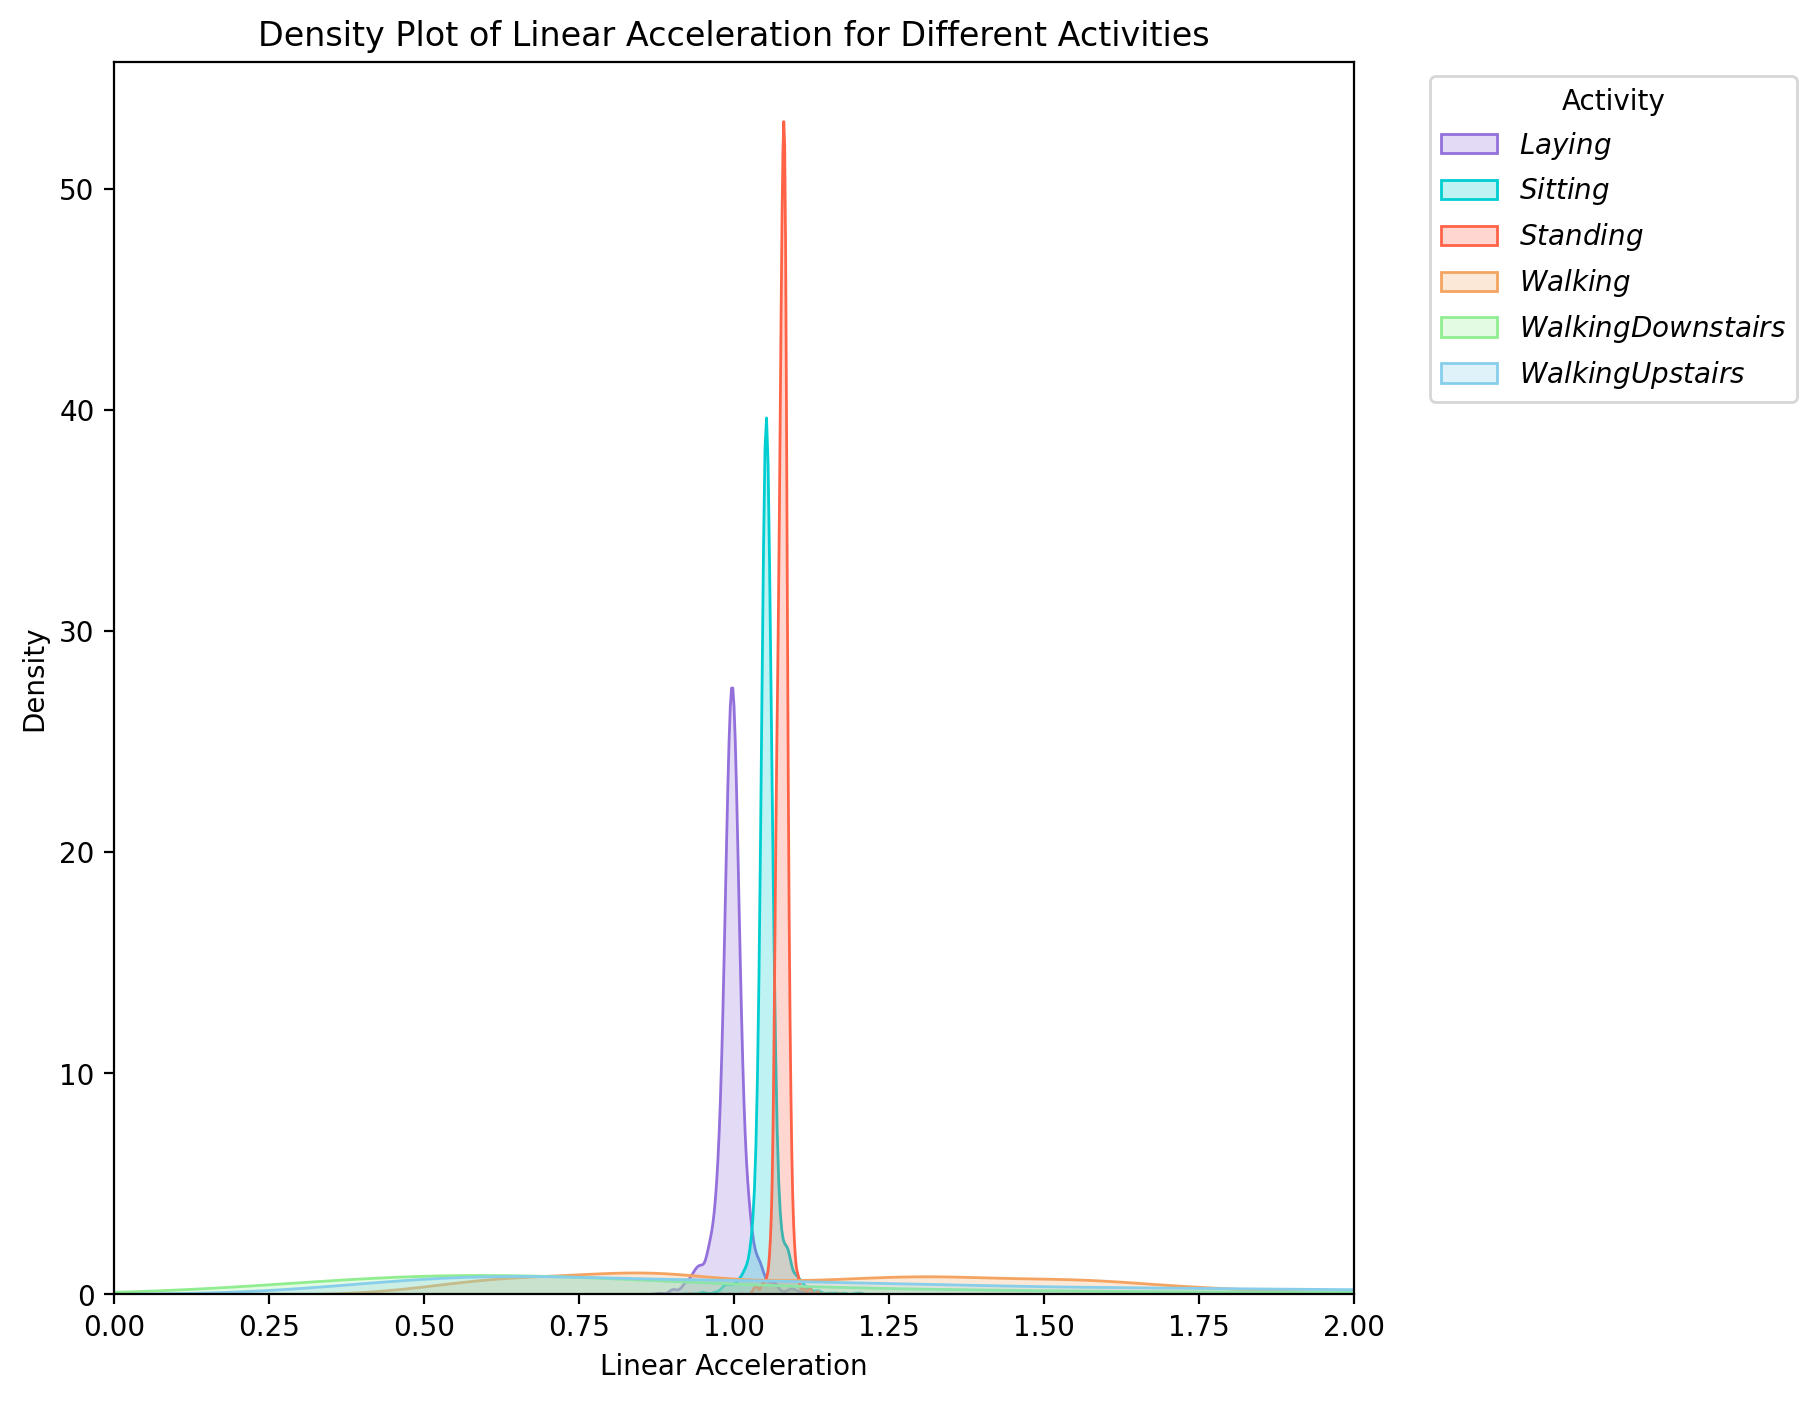

In [5]:
laying_lacc = laying_sample['accx']**2 + laying_sample['accy']**2 + laying_sample['accz']**2
sitting_lacc = sitting_sample['accx']**2 + sitting_sample['accy']**2 + sitting_sample['accz']**2
standing_lacc = standing_sample['accx']**2 + standing_sample['accy']**2 + standing_sample['accz']**2
walking_lacc = walking_sample['accx']**2 + walking_sample['accy']**2 + walking_sample['accz']**2
walking_downstairs_lacc = walking_downstairs_sample['accx']**2 + walking_downstairs_sample['accy']**2 + walking_downstairs_sample['accz']**2
walking_upstairs_lacc = walking_upstairs_sample['accx']**2 + walking_upstairs_sample['accy']**2 + walking_upstairs_sample['accz']**2

plt.figure(figsize=(8, 8))
sns.kdeplot(data=laying_lacc, label='$Laying$', color='mediumpurple', fill=True)
sns.kdeplot(data=sitting_lacc, label='$Sitting$', color='darkturquoise', fill=True)
sns.kdeplot(data=standing_lacc, label='$Standing$', color='tomato', fill=True)
sns.kdeplot(data=walking_lacc, label='$Walking$', color='sandybrown', fill=True)
sns.kdeplot(data=walking_downstairs_lacc, label='$Walking Downstairs$', color='lightgreen', fill=True)
sns.kdeplot(data=walking_upstairs_lacc, label='$Walking Upstairs$', color='skyblue', fill=True)
plt.title('Density Plot of Linear Acceleration for Different Activities')
plt.xlabel('Linear Acceleration')
plt.ylabel('Density')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 2)
plt.show()

**STATIC ACTIVITIES**
- The narrow acceleration range classifies static activities like laying, standing and sitting, as the waveform also shows a near flatline for such activities. The concentrated density signifies minimal variation in acceleration, reflecting the relatively stationary nature of these activities.

**DYNAMIC ACTIVITIES**
- The broad acceleration range classifies dynamic activities like walking, walking downstairs and walking upstairs, as the waveform also shows a high change in acceleration for such activities. The reduced prominence of density peaks implies a greater variability in acceleration values, which is indicative of movement and changes in activity.

Based on the linear acceleration properties of the activities, this plot helps in the distinction between static and dynamic activities. It is feasible to determine whether an activity is largely stationary or involves movement by examining the density peaks and the acceleration value distribution. With the help of this data, models that can categorize activities according to their patterns of acceleration will be developed, which would benefit applications like activity recognition and health monitoring.

In [6]:
#Issues in Laying
#2, 10, 18
#Issues in Sitting
#2, 4, (9), 10, 12, 13, 18, (20), (24)
#Issues in Standing
#(2), (4), (9), 10, (12), (13), 18, (20), (24)
#Issues in Walking
#(24), 4
#Issues in Walking Upstairs
#20, 9

# Q3

**PCA**

(126, 2)


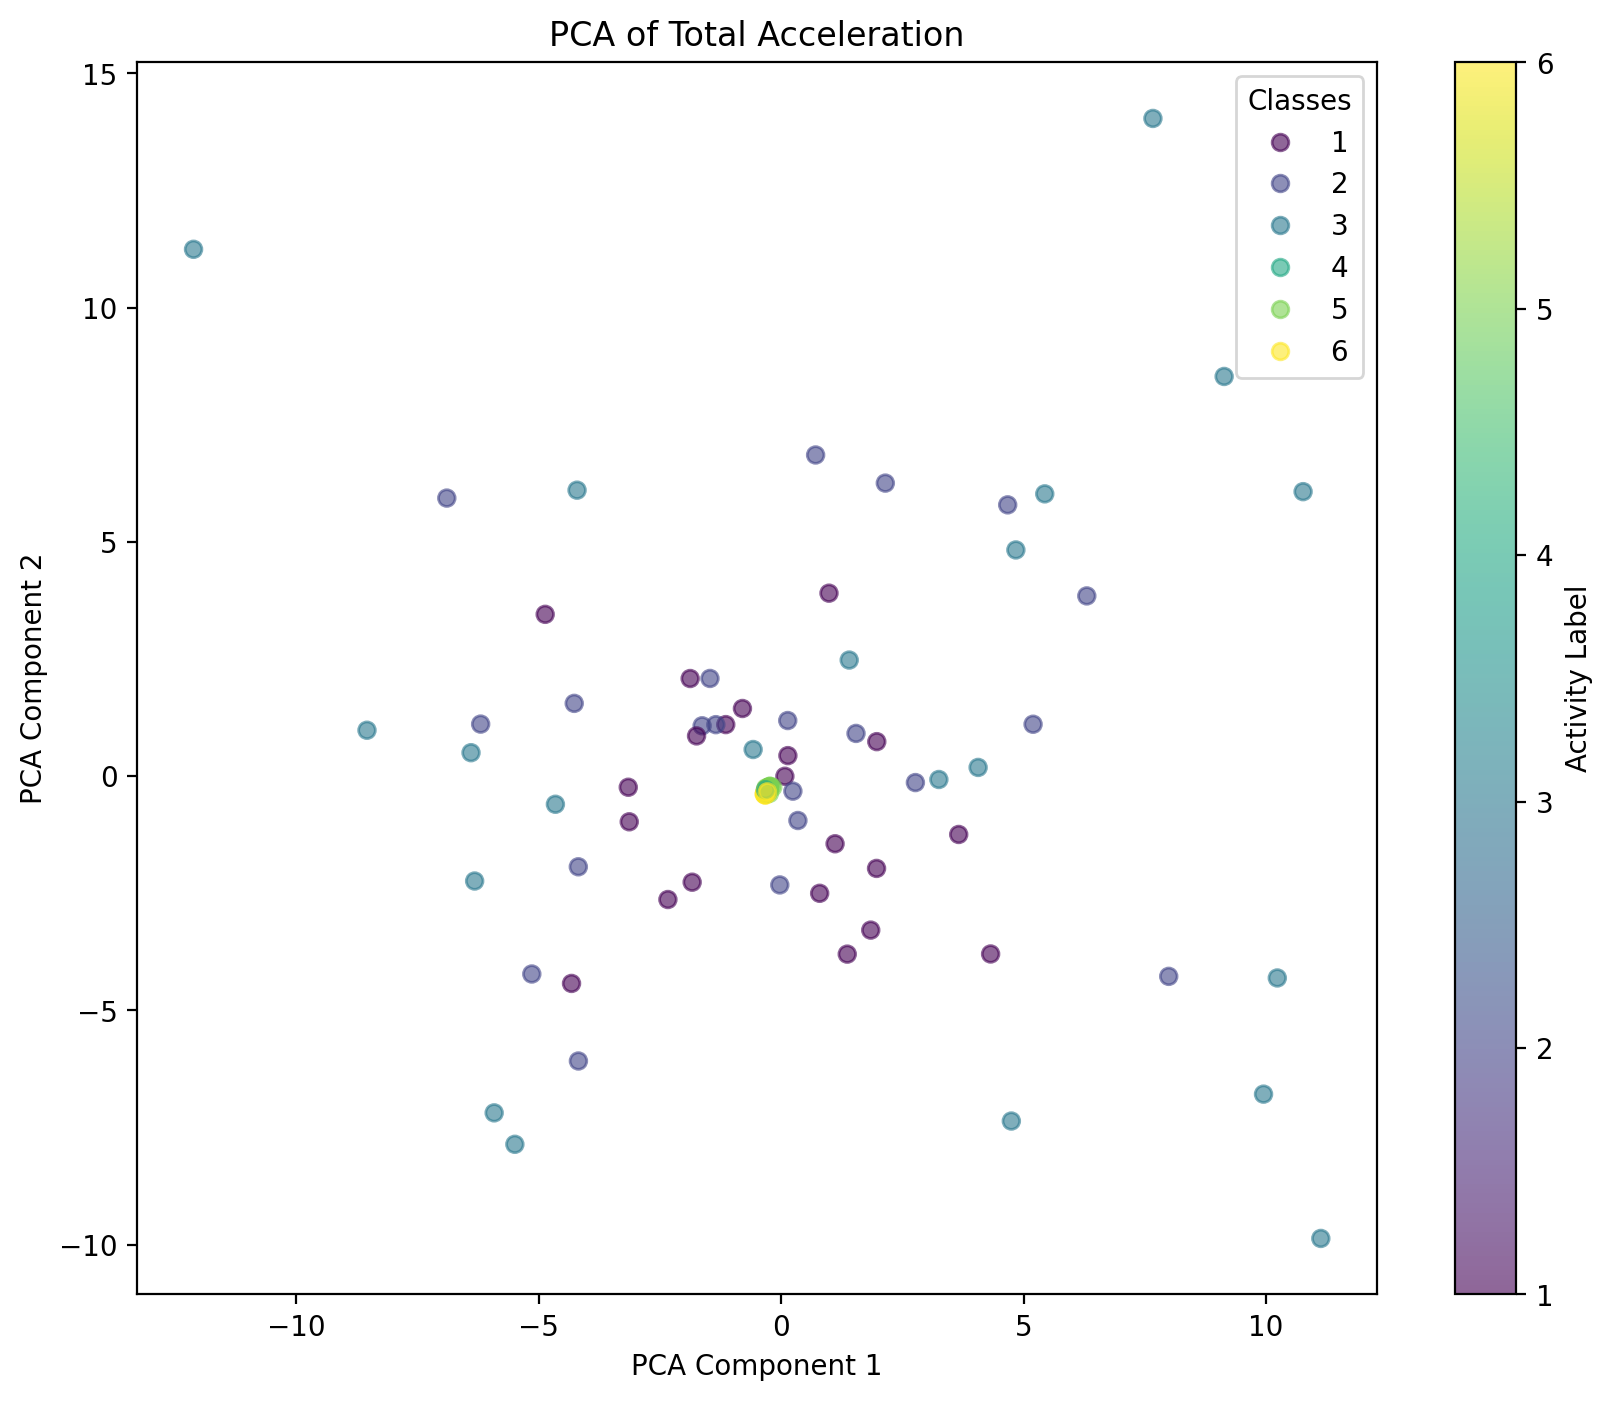

In [7]:
pca = PCA(n_components = 2)
lacc = (X_train[ :, :,0]**2 + X_train[ :, :,1]**2 + X_train[ :, :,2]**2)
lacc_2d = lacc.reshape(lacc.shape[0], -1)

pca_lacc = pca.fit_transform(lacc_2d)
print(pca_lacc.shape)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_lacc[:, 0], pca_lacc[:, 1], c=y_train, alpha=0.6, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Activity Label')
plt.legend(*scatter.legend_elements(), title= 'Classes')
plt.title('PCA of Total Acceleration')
plt.show()

In [8]:
cfg_file = tsfel.get_features_by_domain()
X_train_features = tsfel.time_series_features_extractor(cfg_file, X_train, fs=50, header_names=None)
X_test_features = tsfel.time_series_features_extractor(cfg_file, X_test, fs=50, header_names=None)
print(X_train_features.shape)
print(X_test_features.shape)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152)
(54, 1152)


(126, 2)


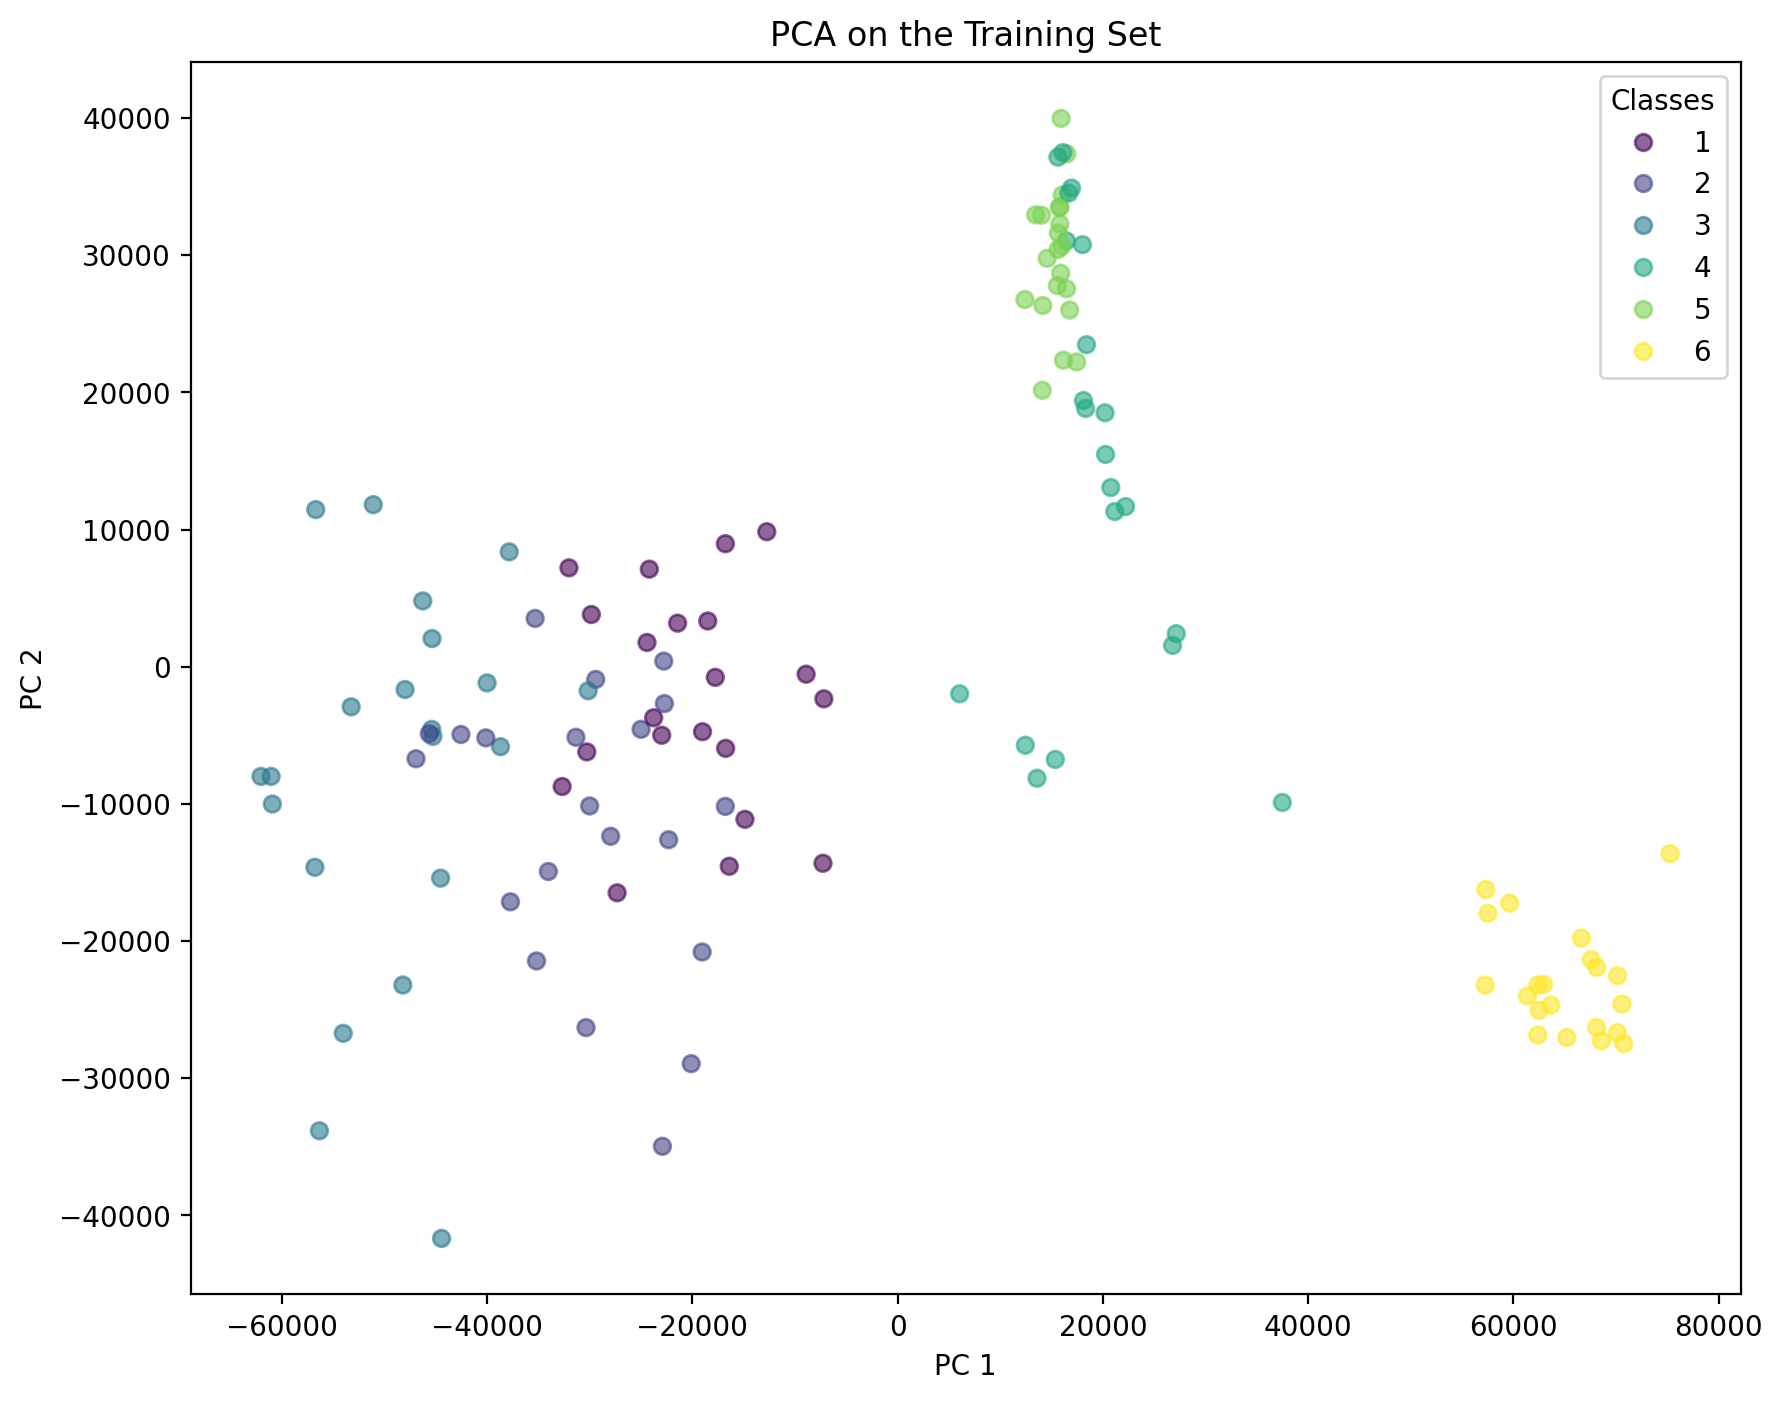

In [9]:
plt.figure(figsize=(10, 8))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_features)
print(X_pca.shape)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap = 'viridis', alpha=0.6)
plt.title('PCA on the Training Set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(*scatter.legend_elements(), title= 'Classes')
plt.show()

Accuracy: 0.6111111111111112
Confusion Matrix:
[[2 2 2 3 0 0]
 [2 5 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


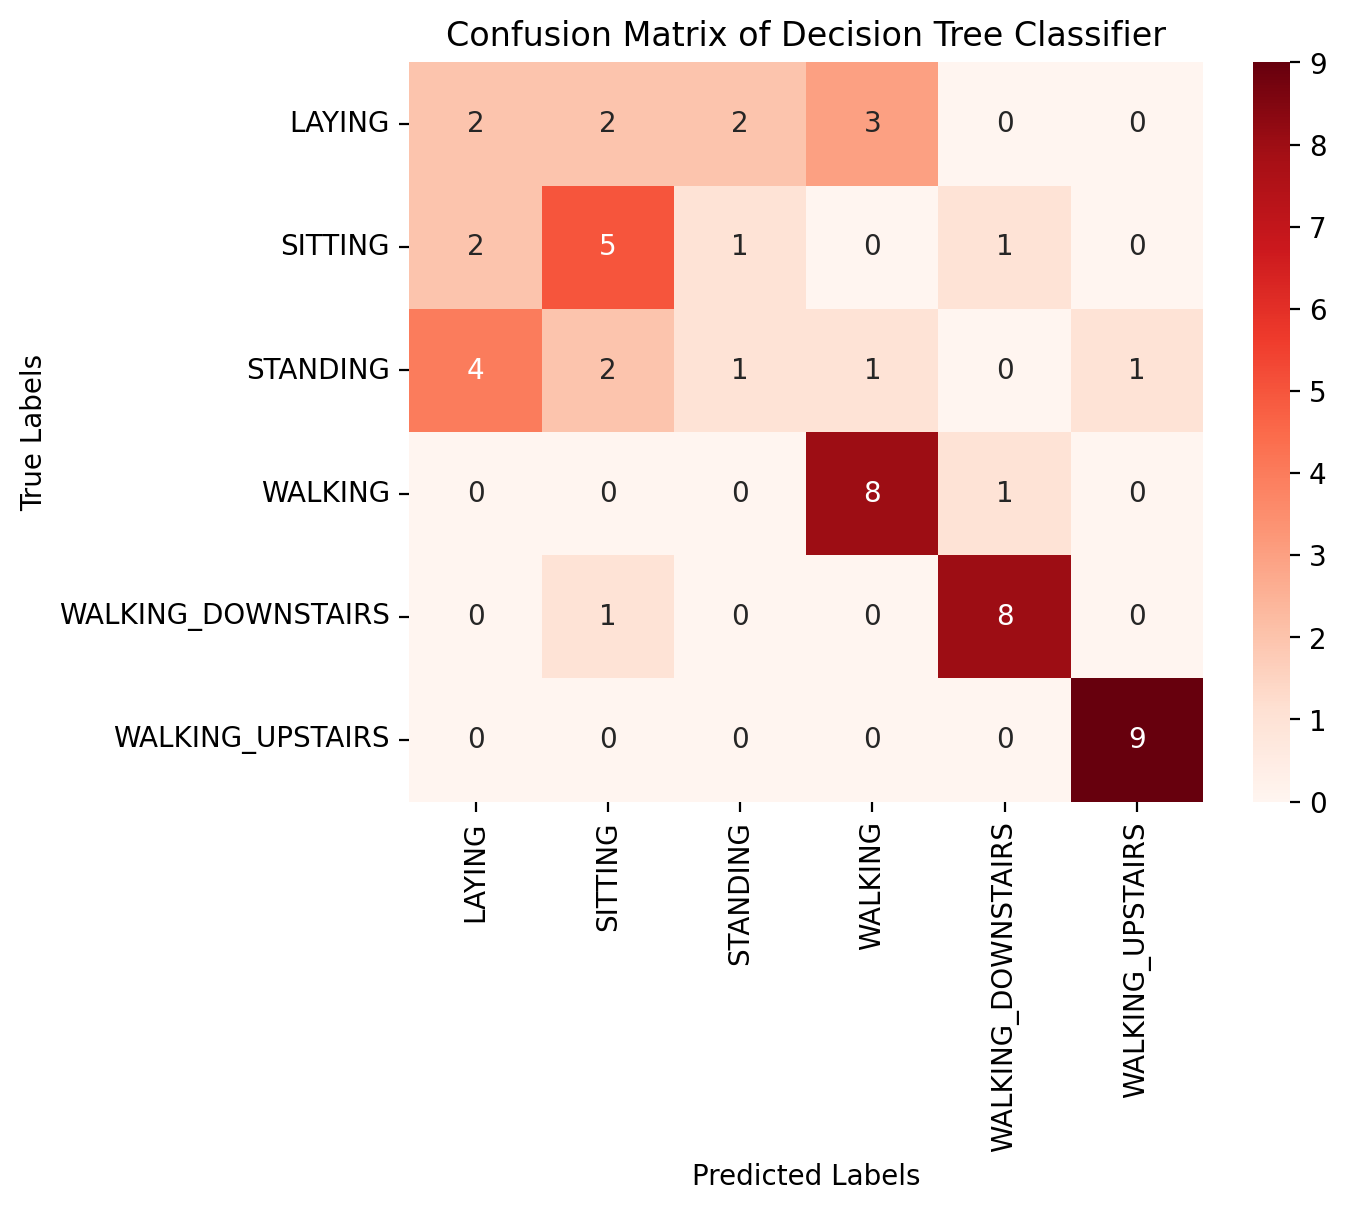

In [10]:
# Reshape X_train, X_test to 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_2d, y_train)
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
y_pred = dt_classifier.predict(X_test_2d)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='d', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.8888888888888888
Confusion Matrix:
[[6 1 2 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


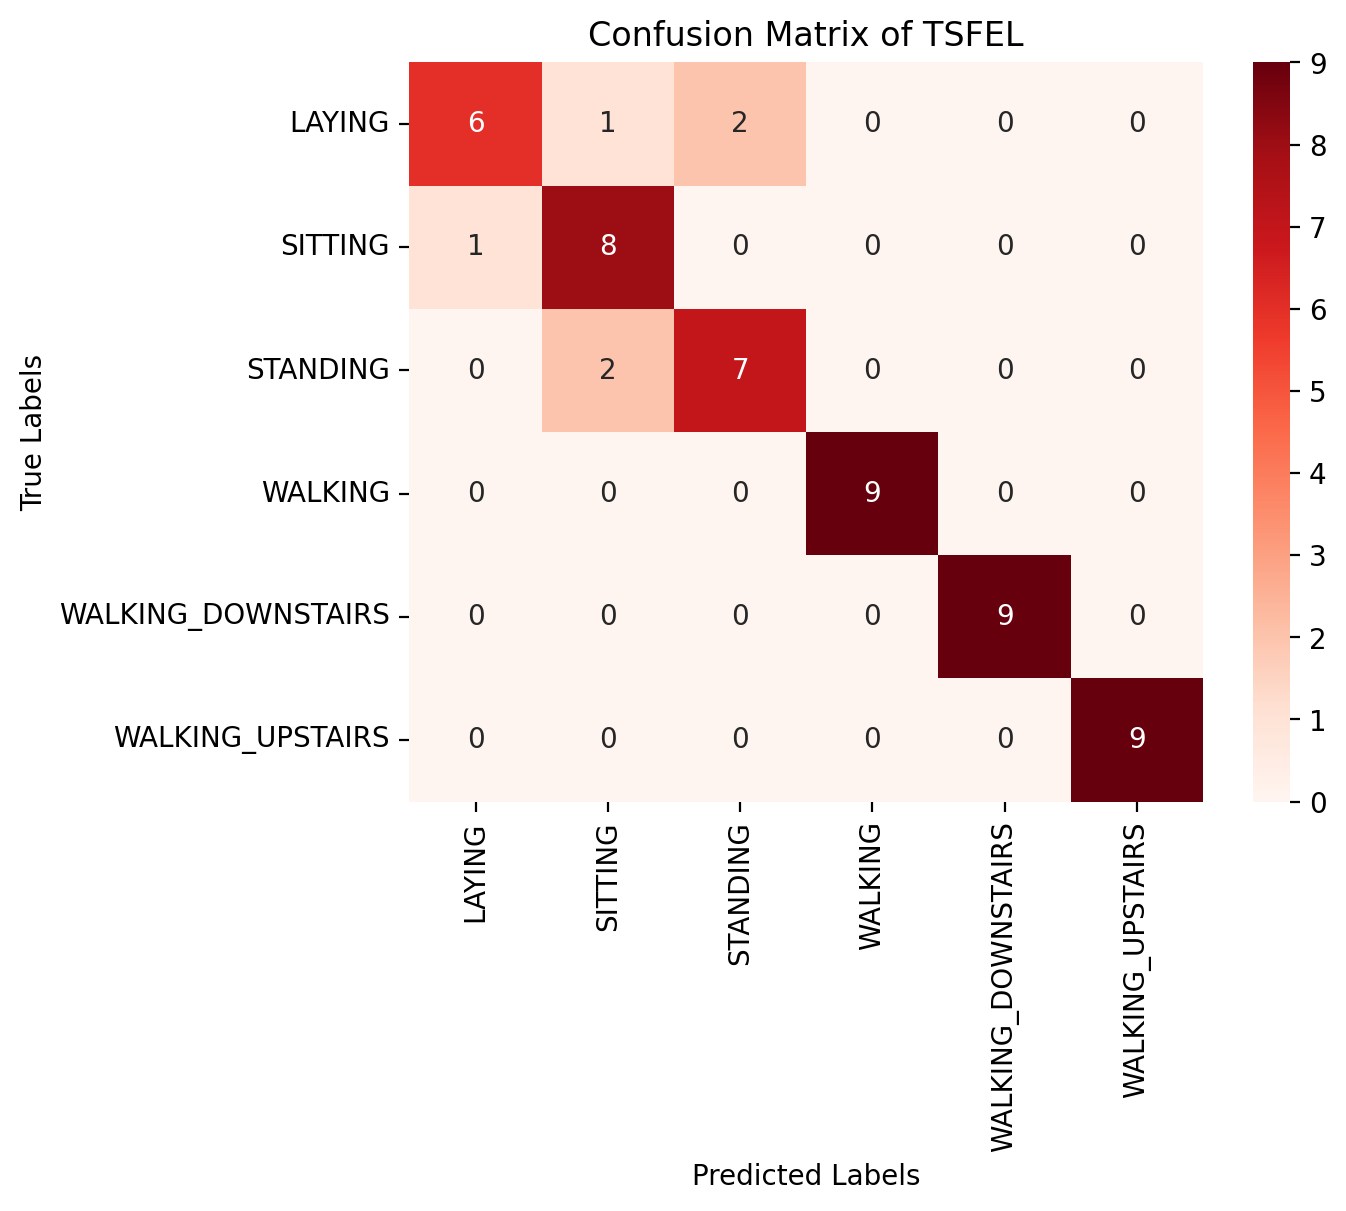

In [11]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_features, y_train)

y_pred = dt_classifier.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='d', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix of TSFEL')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [12]:
print(X_train_features.shape)
print(X_test_features.shape)

(126, 1152)
(54, 1152)


In [16]:
X_train_author = pd.read_csv("D:\\Code\\ML\\fork-it\\HAR\\UCI HAR Dataset\\Train\\X_train.csv")
y_train_author = pd.read_csv("D:\\Code\\ML\\fork-it\\HAR\\UCI HAR Dataset\\Train\\y_train.csv")
X_test_author = pd.read_csv("D:\\Code\\ML\\fork-it\\HAR\\UCI HAR Dataset\\Test\\X_test.csv")
y_test_author = pd.read_csv("D:\\Code\\ML\\fork-it\\HAR\\UCI HAR Dataset\\Test\\y_test.csv")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_author, y_train_author)

print(X_train_author.shape)
print(y_train_author.shape)
print(X_test_author.shape)
print(y_test_author.shape)

y_pred = dt_classifier.predict(X_test_author)
accuracy = accuracy_score(y_test_author, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_author, y_pred))
sns.heatmap(confusion_matrix(y_test_author, y_pred), annot=True, cmap='Reds', fmt='d', xticklabels=activities, yticklabels=activities)
plt.title('Confusion Matrix of TSFEL')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ValueError: Number of labels=7351 does not match number of samples=7352

Yes, the scatter plot has become more comprehensive and understandable by using TSFEL library which featurizes the data and gives better results as compared to PCA. The accuracy increased on using the TSFEL library. The PCA plot had more overlapping points making it difficult to analyse the plot unlike the TSFEL plot where it was scattered giving better results.